# Demo for p2 ( app_count per source)

In [1]:
        import config
        import pandas as pd
        import warnings
        warnings.filterwarnings("ignore")
        
        from bokeh.resources import INLINE
        import bokeh.io
        bokeh.io.output_notebook(INLINE)
        from bokeh.models import HoverTool
        from ipywidgets import interact

        ## Initializing hover text values
        hover =HoverTool(
        tooltips=[
            ( 'date',   '@ds{%F}'  ),
            ( 'real',  '@{y}{%0.2f}' ), # use @{ } for field names with spaces
            ( 'predicted',  '@{yhat}{%0.2f}' ),
            ],
        names=["p1","p2"],
        formatters={
            'ds'      : 'datetime', # use 'datetime' formatter for 'date' field
            'y' : 'printf',
            'yhat' : 'printf',
        
            },
            # display a tooltip whenever the cursor is vertically in line with a glyph
            mode='vline'
            )

        ## Initializing hover text values for analysis
        hover_eval =HoverTool(
        tooltips=[
            ( 'date',   '@run_date{%F}'  ),
            ( 'mape',  '@{test_mape}{%0.2f}' ), # use @{ } for field names with spaces
            ],
        names=["p1","p2"],
        formatters={
            'run_date'      : 'datetime', # use 'datetime' formatter for 'date' field
            'test_mape' : 'printf',
            },
            # display a tooltip whenever the cursor is vertically in line with a glyph
            mode='vline'
            )
    
        tools = 'pan,wheel_zoom,xbox_select,reset'

        import pymysql


        def connect_to_mysql():
            connection = pymysql.connect(host = config.db_host,
                                port= config.db_port,
                                user= config.db_user,
                                password= config.db_pass,
                                db= config.db_name,
                                charset='utf8',
                                cursorclass=pymysql.cursors.DictCursor)
            return connection

        conn=connect_to_mysql()

Loading BokehJS ...

In [2]:
    ## hover text for realtime prediction selection
    def for_hover1(name):


        from bokeh.models import HoverTool
    
        hover1 =HoverTool(
            tooltips=[
                ( 'date',   '@ds{%F}'            ),
                ( name,  '@{yhat}{%0.2f}' ), 
            ],
        names=["p1","p2"],
        
            formatters={
                'ds'      : 'datetime', # use 'datetime' formatter for 'date' field
        
                'yhat' : 'printf',
            },
            # display a tooltip whenever the cursor is vertically in line with a glyph
            mode='vline'
        )
        return hover1
        

    ## For plotting the graph for admin (evaluation graph)
    def plot_test1(d,d1,d2,title,name):

        from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label

        from ipywidgets import interact
        import numpy as np

        from bokeh.layouts import widgetbox
        from bokeh.models.widgets import TextInput
        from bokeh.layouts import row, column,gridplot

        from bokeh.io import  output_notebook , show , push_notebook
        from bokeh.models.widgets import TextInput
        from bokeh.plotting import figure
        from datetime import datetime
    
        output_notebook()
        d = d.sort_values(by='ds')
        if(len(d)>0):
            d2 = d2.sort_values(by='run_date')
            p=figure(title=title,plot_height = 400 ,plot_width =700, tools=[tools,hover,],
                    x_axis_type='datetime', x_axis_label='date' ,y_axis_label=name )
            p.line('date',name, name='p2', source=d1,color="red", line_width=3,legend='train_data')
            p.circle('date',name, source=d1,color="red", line_width=3)

            p.line('ds','y',name="p1", source=d,color="#2222aa", line_width=3,legend='actual')
            p.circle('ds','y', source=d,color="#2222aa", line_width=3)
            p.line('ds','yhat', source=d,color="green", line_width=3,legend='predicted')
            p.circle('ds','yhat', source=d,color="green", line_width=3)

            text_input1 = TextInput(value=str(round(d2.test_rmse.iloc[(len(d2)-1)],2)), title="RMSE :")
            text_input2 = TextInput(value=str(round(d2.test_mape.iloc[(len(d2)-1)],2)), title="MAPE :")

            b = row(widgetbox(text_input1),widgetbox(text_input2))
            a = column(b,p)

        else:
            text_input1 = TextInput(value=str('This combination not available'), title="Error :")
            a = row(widgetbox(text_input1))

        show(a)

    ## plotting graph for end user (real time prediction)
    def plot_test_user(d,d1,title,name,hover1):

        from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label

        from ipywidgets import interact
        import numpy as np

        from bokeh.layouts import widgetbox
        from bokeh.models.widgets import TextInput
        from bokeh.layouts import row, column,gridplot

        from bokeh.io import  output_notebook , show , push_notebook
        from bokeh.models.widgets import TextInput
        from bokeh.plotting import figure
        from datetime import datetime
    
        output_notebook()
        d=d.sort_values(by='ds')
        if(len(d)>0):

            p=figure(title=title,plot_height = 400 ,plot_width =700, tools=[tools,hover1],
                    x_axis_type='datetime', x_axis_label='date', y_axis_label=name)
            p.line('date',name, name='p2',source=d1,color="red", line_width=3,legend='train_data')
            p.circle('date',name, source=d1,color="red", line_width=3)

            p.line('ds','yhat',name="p1", source=d,color="#2222aa", line_width=3,legend='forecast')
            p.circle('ds','yhat', source=d,color="#2222aa", line_width=3)

        else:
            text_input1 = TextInput(value=str('This combination not available'), title="Error :")
            p = row(widgetbox(text_input1))

        show(p)


    ## For plotting the graph for admin (evaluation graph)
    def plot_analysis(d,title,name):

        from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label

        from ipywidgets import interact
        import numpy as np

        from bokeh.layouts import widgetbox
        from bokeh.models.widgets import TextInput
        from bokeh.layouts import row, column,gridplot

        from bokeh.io import  output_notebook , show , push_notebook
        from bokeh.models.widgets import TextInput
        from bokeh.plotting import figure
        from datetime import datetime
    
        output_notebook()
        
        if(len(d)>0):
            d = d.sort_values(by='run_date')
            p=figure(title=title,plot_height = 400 ,plot_width =700, tools=[tools,hover_eval,],
                    x_axis_type='datetime', x_axis_label='date' ,y_axis_label=name )
            p.line('run_date',name, name='p2', source=d,color="red", line_width=3,legend='mape')
            p.circle('run_date',name, source=d,color="green", line_width=3)

            
            a = column(p)

        else:
            text_input1 = TextInput(value=str('This combination not available'), title="Error :")
            a = row(widgetbox(text_input1))

        show(a)

## Exploratory analysis of data

In [3]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession


from pyspark.sql import SparkSession

In [4]:
    conn=connect_to_mysql()


    # initialise sparkContext
    spark1 = SparkSession.builder \
        .master(config.sp_master) \
        .appName(config.sp_appname) \
        .config('spark.executor.memory', config.sp_memory) \
        .config("spark.cores.max", config.sp_cores) \
        .getOrCreate()
    
    sc = spark1.sparkContext

    # using SQLContext to read parquet file
    from pyspark.sql import SQLContext
    sqlContext = SQLContext(sc)

####  loading the parquet file data to spark dataframe

In [15]:
df = sqlContext.read.parquet('./../datas/appid_datapoint_parquet1')
df.head()

Row(time_stamp=1510801200000, source='134.141.5.104', zone='\\N', target_address='10.51.1.95/', application='Sun RPC', applicationgroup='Protocols', target_attribute_id=215904025, byte_count=8776, tx_byte_count=4920, rx_byte_count=3856, flow_count=59, tx_flow_count=29, rx_flow_count=30, tcp_rsp_time=1011, app_rsp_time=3391, user_data='\\N')

#### taking a source's data as example

In [16]:
s_list = ['134.141.115.101', '134.141.208.230', '10.6.1.101',
       '134.141.5.104', '134.141.121.91', '134.141.5.102',
       '134.141.224.29']

In [44]:
#a = config.apps[0]
#print(a)
data_a = df[(df.source == '10.6.1.101' ) ]

#### finding app count

In [18]:
df_t = data_a.registerTempTable('dummy')
df_t = sqlContext.sql('select count(distinct application) as app_count, time_stamp, source from dummy group by source, time_stamp')

df_t = df_t.toPandas()

In [19]:
df_t.head()

,app_count,time_stamp,source
0,843,1511971200000,10.6.1.101
1,359,1510369200000,10.6.1.101
2,652,1512478800000,10.6.1.101
3,365,1518152400000,10.6.1.101
4,670,1517950800000,10.6.1.101


In [27]:
df_t.tail()

,app_count,time_stamp,source
time_stamp,,,
2018-02-07 08:00:00,377,1517990400000,10.6.1.101
2017-12-27 10:00:00,328,1514368800000,10.6.1.101
2018-02-02 10:00:00,379,1517565600000,10.6.1.101
2017-12-23 06:00:00,320,1514008800000,10.6.1.101
2017-12-22 12:00:00,348,1513944000000,10.6.1.101


In [26]:
dates_outlook = pd.to_datetime(pd.Series(df_t.time_stamp),unit='ms')
df_t.index = dates_outlook 

#### correlation

In [22]:
df_t.corr()

,app_count,time_stamp
app_count,1.000000,-0.051788
time_stamp,-0.051788,1.000000


#### plotting of source '10.6.1.101'

In [31]:
df_t = df_t.sort_values(by='time_stamp')


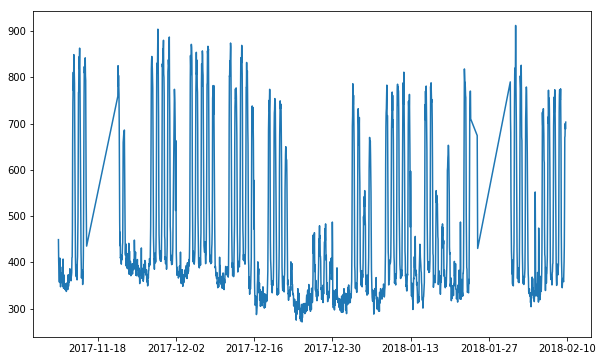

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

plt.plot(df_t.app_count)
plt.show()

#### Summary

In [33]:
df_t.app_count.describe()

count    1874.000000
mean      457.536286
std       161.077790
min       271.000000
25%       346.250000
50%       386.000000
75%       521.000000
max       912.000000
Name: app_count, dtype: float64

#### Another example

In [35]:
s_list

['134.141.115.101',
 '134.141.208.230',
 '10.6.1.101',
 '134.141.5.104',
 '134.141.121.91',
 '134.141.5.102',
 '134.141.224.29']

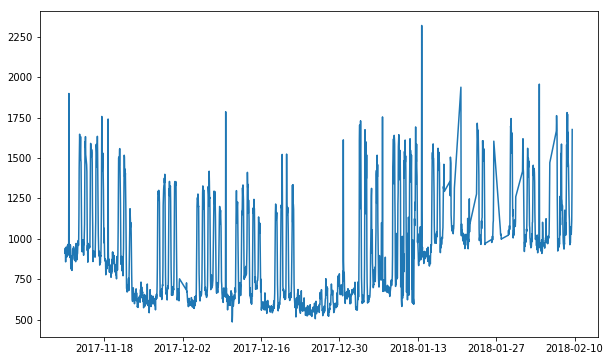

In [36]:
data_a = df[(df.source == '134.141.5.104' ) ]
df_t = data_a.registerTempTable('dummy')
df_t = sqlContext.sql('select count(distinct application) as app_count, time_stamp, source from dummy group by source, time_stamp')

df_t = df_t.toPandas()
dates_outlook = pd.to_datetime(pd.Series(df_t.time_stamp),unit='ms')
df_t.index = dates_outlook 
df_t = df_t.sort_values(by='time_stamp')

plt.plot(df_t.app_count)
plt.show()

### Aggregating to  1 day


Here we aggregates the 24 hours data (takes peak app_rsp_time value) to 1 day datapoint


<function matplotlib.pyplot.show(*args, **kw)>

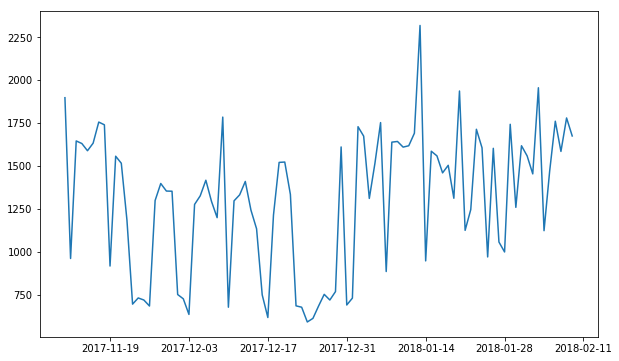

In [45]:

df_t['date'] = df_t.index.date
df_t = pd.DataFrame(df_t.groupby(by='date').app_count.max())
    
df_t = df_t.reset_index()
df_t = df_t.sort_values(by='date',ascending=True)
df_t.index = df_t['date']

plt.plot(df_t.app_count)
plt.show

## Modelling

Since the data shows some regularity in timestamp so we decided to use timeseries prediction model 

Here we used prophet model for the forecasting and which will run all the day 12am with datas of 90 days before and then 30 days data is forecasted ,model is evaluated. All the results are storing in 'netsightrpt'  databse , 

So  in this demo notebook we will display the output predicted by the prophet model

script used for this is **p1_final_agg.py**

## data fetching and cleaning

* Here the data is fetching from db ,which is the 90 days cleaned data used for the modelling.

* anlyse_df contains the rmse,mape value for all combinations.

* validation_df contains the actual and predited values of app_count

* forecast_df contains the 30 days forecasted values of app_count

In [37]:
with conn.cursor() as cursor:
            # Read a  record
            sql = "select * from data_nofapps_per_source "
            cursor.execute(sql)
            p3_df = pd.DataFrame(cursor.fetchall())

p3_df = p3_df.sort_values(by='app_count')
#dates = p3_df.time_stamp.astype(int)
#dates_outlook =pd.to_datetime(pd.Series(dates),unit='ms')
#p3_df.index = p3_df['date']
p3_df = p3_df.sort_values(by='date')

with conn.cursor() as cursor:
            # Read a  record
            sql = "select * from analyse_nofapps_per_source partition (latest)"
            cursor.execute(sql)
            p3_analysis_df = pd.DataFrame(cursor.fetchall())
            
with conn.cursor() as cursor:
            # Read a  record
            sql = "select * from valid_nofapps_per_source "
            cursor.execute(sql)
            p3_eval_df = pd.DataFrame(cursor.fetchall())
            
with conn.cursor() as cursor:
            # Read a  record
            sql = "select * from forecast_nofapps_per_source partition (latest)"
            cursor.execute(sql)
            p3_forecast_df = pd.DataFrame(cursor.fetchall())

In [38]:
p3_df.head()


,app_count,date,source
174,143,2017-11-11,134.141.115.101
299,99,2017-11-11,134.141.208.230
83,963,2017-11-11,134.141.5.104
0,373,2017-11-11,10.6.1.101
175,165,2017-11-12,134.141.115.101


In [39]:
p3_eval_df[(p3_eval_df.source=='10.6.1.101')].head()


,APE,ds,error_test,source,y,yhat
0,19.087263,2018-01-07,65.469312,10.6.1.101,343,277.530688
1,21.700045,2018-01-08,169.911353,10.6.1.101,783,613.088647
2,11.350072,2018-01-09,87.168550,10.6.1.101,768,680.831450
3,15.406731,2018-01-10,120.942841,10.6.1.101,785,664.057159
4,32.106399,2018-01-11,260.382899,10.6.1.101,811,550.617101


In [40]:
df3 =p3_df.iloc[0:(len(p3_df))].copy()

#df3.columns=['application','source','time_stamp1','user_count']
#df3 = df3.reset_index()
#df3['date']=p3_df.iloc[0:(len(p3_df))].index.date


def update(source,show_date_limit=1):
    
    d = p3_eval_df[(p3_eval_df.source==source) ]
    d1 = df3[(df3.source==source) ]
    d2 = p3_analysis_df[(p3_analysis_df.source==source)]
    
    d1['ds'] =d1.date
    d1['y'] = d1.app_count
    d1['ds'] = pd.to_datetime(d1['ds'])
    d1 = d1[d1.ds<d.ds.min()]

    u_date = pd.DataFrame(d1['date'].unique())
    u_date1 = u_date.iloc[(len(u_date)-show_date_limit):len(u_date),0]
    d1 = d1[d1.date.isin(u_date1)]
    

    ## for analysis data representtion
    #with conn.cursor() as cursor:
    #        # Read a  record
    #        sql = "select * from analyse_p3_beta where application='"+application+"' and source='"+source+"'"
    #        cursor.execute(sql)
    #        analyse = pd.DataFrame(cursor.fetchall())
    
    #push_notebook()

    plot_test1(d,d1,d2,'Evaluation','app_count')
    #plot_analysis(analyse,'Analysis','test_mape')

def update_user(source,show_date_limit=1):
    
    d = p3_forecast_df[(p3_forecast_df.source==source)]
    d1 = df3[(df3.source==source)]
    
    d1['ds']=d1.date
    d1['yhat']=d1.app_count
    u_date = pd.DataFrame(d1['date'].unique())
    u_date1 = u_date.iloc[(len(u_date)-show_date_limit):len(u_date),0]
    d1 = d1[d1.date.isin(u_date1)]
    #push_notebook()
    hover1=for_hover1('app_count')
    plot_test_user(d,d1,'Evaluation','app_count',hover1)

###  Validation result

- Here number of applications per source is predicted
- The next 30 days number of applications is predicted and evaluated .

In [41]:
conn.close()

In [42]:
interact(update, source=list(p3_analysis_df.source.unique()),show_date_limit=(1,30,1))

interactive(children=(Dropdown(description='source', options=('10.6.1.101', '134.141.5.104', '134.141.5.102', …

<function __main__.update(source, show_date_limit=1)>

### Forecast result

- Here number of applications per source is predicted
- The next 30 days number of applications is predicted for end users.

In [43]:
interact(update_user, source=list(p3_analysis_df.source.unique()),show_date_limit=(1,30,1))

interactive(children=(Dropdown(description='source', options=('10.6.1.101', '134.141.5.104', '134.141.5.102', …

<function __main__.update_user(source, show_date_limit=1)>